# Representativeness of Data Lab

### Introduction

In this lesson, let's use some of what we know about the representativeness of our dataset to explore a movie dataset.  

You can see the kind of information we have about a movie here.

In [1]:
import pandas as pd

movies_df = pd.read_csv("https://raw.githubusercontent.com/jigsawlabs-student/tech-interview/main/movies.csv")

In [2]:
movies_df[:2]

,title,genre,budget,runtime,year,month,revenue
0,Oliver Twist,Crime,50000000,130.0,2005,9,42093706
1,X-Men: Apocalypse,Science Fiction,178000000,144.0,2016,5,543934787


Ok, so assume as a goal, that that we would like to see how items like a genre or budget impact the income of a movie made today.  Before we do so, we want to *examine our dataset to see how representative it may would be of movies made today*. 

Then, use that information to select the portion of the data you believe is high enough quality and representative enough to draw conclusions from.

So what's our task in this lab:

1. Explore the data to see the representativeness of the data
2. Select the portion of the data that is more representative

This will be a little different in that it is more freeform than other labs.

### Before getting started

As a way to review, let's remember that there were a few different ways that we checked our data:

1. Comparing groups of our data to what we see in the real world
2. Checking how recent our data is
3. Looking at distributions and outliers in our data 
4. Looking at missing values in our data (with isna)
5. Remember variables that are important are: 
    * The target variable (as the whole point is to see what leads to changes in this variable, here revenue) 
    * Dates (as the more recent the data the more valuable it representative it typically is of present day)

After exploring the quality of our (imperfect) data, make a determination as to how we might still make use of our data to determine how items like genre, or budget might impact the revenue.

### Exploring our data

Ok, so here's the dataset.

In [38]:
movies_df['title'].value_counts()

King Kong                                   2
Harry Potter and the Half-Blood Prince      2
Superman Returns                            2
The Golden Compass                          2
The Chronicles of Narnia: Prince Caspian    2
                                           ..
Little Nicholas                             1
Out of Time                                 1
Joy Ride                                    1
Escape from Planet Earth                    1
Muppets from Space                          1
Name: title, Length: 2000, dtype: int64

In [4]:
movies_df[:2]

,title,genre,budget,runtime,year,month,revenue
0,Oliver Twist,Crime,50000000,130.0,2005,9,42093706
1,X-Men: Apocalypse,Science Fiction,178000000,144.0,2016,5,543934787


In [11]:
recent_movies_df = movies_df[movies_df['year'] > 2010]

In [17]:
# movies_df[movies_df['year'] == 2015]['month'].value_counts().plot(kind = 'barh')

<AxesSubplot: ylabel='Frequency'>

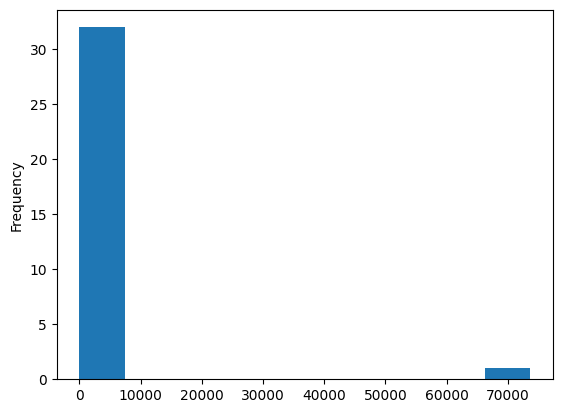

In [21]:
recent_movies_df[recent_movies_df['revenue'] < 100_000]['revenue'].plot(kind = 'hist')

In [26]:
zero_rev_df = recent_movies_df[recent_movies_df['revenue'] == 0]

In [28]:
zero_rev_df[:5]

,title,genre,budget,runtime,year,month,revenue
13,Evolution,NaN,0,81.0,2015,9,0
84,Accidental Love,Romance,26000000,100.0,2015,2,0
133,Thunder and the House of Magic,NaN,34000000,85.0,2013,12,0
192,A Monster in Paris,Adventure,25000000,90.0,2011,10,0
222,Dragon Nest: Warriors' Dawn,Adventure,40000000,88.0,2014,5,0


In [29]:
recent_movies_nonzero = recent_movies_df[recent_movies_df['revenue'] != 0]

In [32]:
recent_movies_nonzero['year'].value_counts()

2011    102
2013     91
2012     86
2014     77
2015     76
2016     45
Name: year, dtype: int64

In [ ]:
recent_movies_nonzero

In [34]:
recent_movies_nonzero[recent_movies_nonzero['year'] == 2015].sort_values('revenue', ascending = False)[:15]

,title,genre,budget,runtime,year,month,revenue
413,Jurassic World,Action,150000000,124.0,2015,6,1513528810
1589,Furious 7,Action,190000000,137.0,2015,4,1506249360
1221,Avengers: Age of Ultron,Action,280000000,141.0,2015,4,1405403694
1310,Minions,NaN,74000000,91.0,2015,6,1156730962
798,Spectre,Action,245000000,148.0,2015,10,880674609
520,Inside Out,Drama,175000000,94.0,2015,6,857611174
1152,Mission: Impossible - Rogue Nation,Action,150000000,131.0,2015,7,682330139
608,The Hunger Games: Mockingjay - Part 2,Action,160000000,137.0,2015,11,653428261
1781,The Martian,Drama,108000000,141.0,2015,9,630161890
1492,Fifty Shades of Grey,Drama,40000000,125.0,2015,2,571006128


1. Wait on the analysis until after cleaning the data (at least a little)
2. Can seem nebulous but:
    1. Focus on the time period
    2. The target
    3. Compare against the real world
    * Focusing on the year first, can help save you time later on